In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(1)
np.random.seed(1)

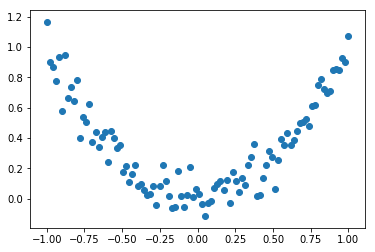

In [2]:
LR = 0.01
BATCH_SIZE = 32

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis] # shape(100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2)+noise

# plot data
plt.scatter(x, y)
plt.show()

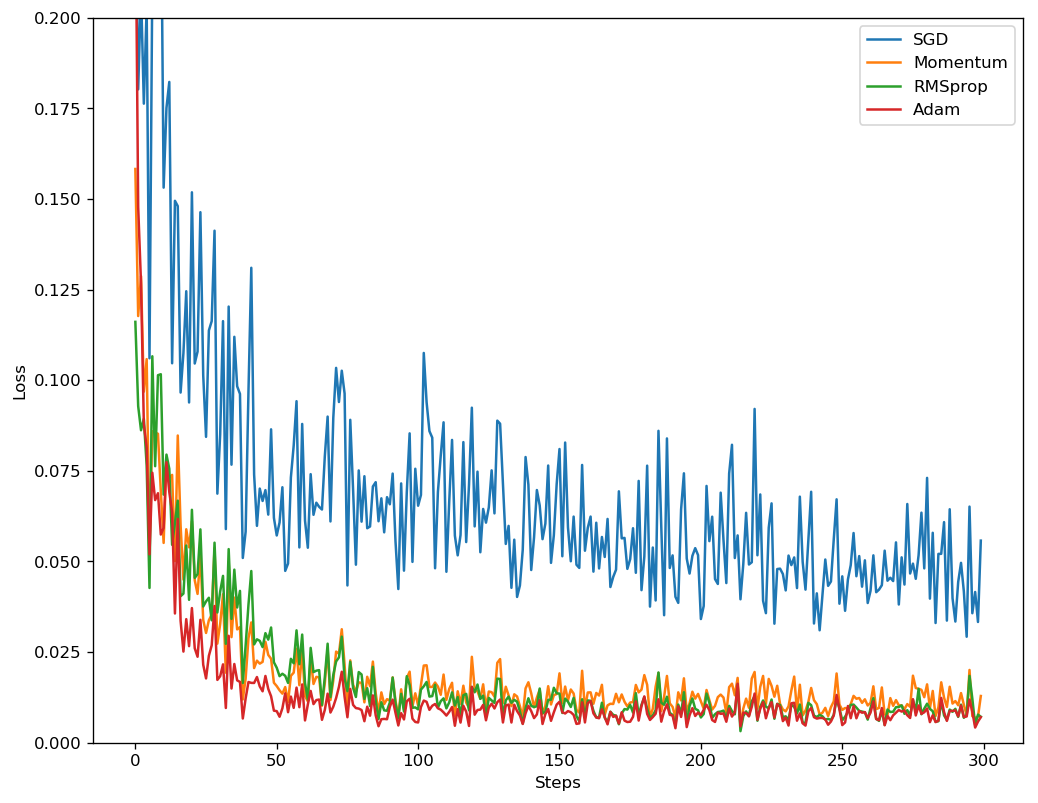

In [7]:
# default network
class Net:
    def __init__(self, opt, **kwargs):
        self.x = tf.placeholder(tf.float32, [None, 1])
        self.y = tf.placeholder(tf.float32, [None, 1])
        l = tf.layers.dense(self.x, 20, tf.nn.relu)
        o = tf.layers.dense(l, 1)
        self.loss = tf.losses.mean_squared_error(self.y, o)
        self.train = opt(LR, **kwargs).minimize(self.loss)

with tf.Graph().as_default(), tf.Session() as sess:
    # defferent Nets
    net_SGD = Net(tf.train.GradientDescentOptimizer)
    net_Momentum = Net(tf.train.MomentumOptimizer, momentum=0.9)
    net_RMSprop = Net(tf.train.RMSPropOptimizer)
    net_Adam = Net(tf.train.AdamOptimizer)
    nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]
    
    sess.run(tf.global_variables_initializer())
    
    losses_his = [[], [], [], []] # record loss
    
    # training 
    for step in range(300):
        index = np.random.randint(0, x.shape[0], BATCH_SIZE)
        b_x = x[index]
        b_y = y[index]
        
        for net, l_his in zip(nets, losses_his):
            _, l = sess.run([net.train, net.loss], {net.x:b_x, net.y:b_y})
            l_his.append(l) # record loss
            
    # plot loss history
    plt.figure(figsize=(10, 8), dpi=120)
    labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
    for i, l_his in enumerate(losses_his):
        plt.plot(l_his, label=labels[i])
    plt.legend(loc='best')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.ylim((0, 0.2))
    plt.show()